# Introduction to Linear Regression
### Simple Linear Equation (y = mx + c)

In [2]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read dataset
df = pd.read_csv("Advertising.csv")

In [4]:
# load the data 
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


**Is there a relationship between *total* advertising spend and *sales*?**

In [5]:
df['total-expense'] = df['TV'] + df['radio'] + df['newspaper']

<AxesSubplot:xlabel='total-expense', ylabel='sales'>

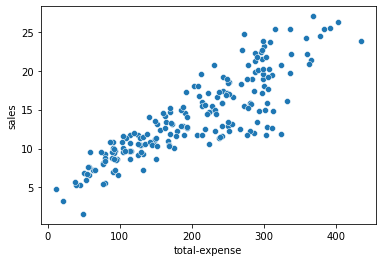

In [7]:
sns.scatterplot(x='total-expense',y='sales',data = df)

## Least Square Lines
### finding line of best fit in the scatterplot

**Understanding what a line of best fit answers.**
If someone was to spend a total of $200 , what would the expected sales be? We have simplified this quite a bit by combining all the features into "total spend", but we will come back to individual features later on. For now, let's focus on understanding what a linear regression line can help answer.

**Our next ad campaign will have a total spend of $200, how many units do we expect to sell as a result of this?**

<AxesSubplot:xlabel='total-expense', ylabel='sales'>

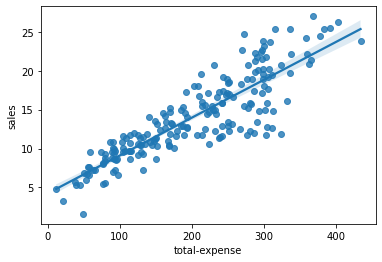

In [8]:
# Basically, we want to figure out how to create this line
sns.regplot(x='total-expense',y='sales',data = df)

So, here in y = mx + c , y-coefficient = sales, x-coefficient = total-expense

In [9]:
x = df['total-expense']
y = df['sales']

polyfit - 

The simplest type of fit is the linear fit (a first-degree polynomial function), in which the data points are fitted using a straight line. The general equation of a straight line is:

y = mx + q

Polyfit only works with 1D array.

In [10]:
# returns highest order co-effients first
model = np.polyfit(x,y,1)
model

array([0.04868788, 4.24302822])

y = mx + c; here, m = 0.04868, and c = 4.2430

In [11]:
# Potential Future Spend Budgets - np.linspace returns a number from 100 to 500.
potential_spend = np.linspace(0,500,100)
potential_spend

array([  0.        ,   5.05050505,  10.1010101 ,  15.15151515,
        20.2020202 ,  25.25252525,  30.3030303 ,  35.35353535,
        40.4040404 ,  45.45454545,  50.50505051,  55.55555556,
        60.60606061,  65.65656566,  70.70707071,  75.75757576,
        80.80808081,  85.85858586,  90.90909091,  95.95959596,
       101.01010101, 106.06060606, 111.11111111, 116.16161616,
       121.21212121, 126.26262626, 131.31313131, 136.36363636,
       141.41414141, 146.46464646, 151.51515152, 156.56565657,
       161.61616162, 166.66666667, 171.71717172, 176.76767677,
       181.81818182, 186.86868687, 191.91919192, 196.96969697,
       202.02020202, 207.07070707, 212.12121212, 217.17171717,
       222.22222222, 227.27272727, 232.32323232, 237.37373737,
       242.42424242, 247.47474747, 252.52525253, 257.57575758,
       262.62626263, 267.67676768, 272.72727273, 277.77777778,
       282.82828283, 287.87878788, 292.92929293, 297.97979798,
       303.03030303, 308.08080808, 313.13131313, 318.18

In [12]:
predicted_sales =  0.04868788*potential_spend + 4.24302822

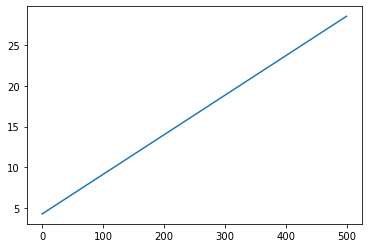

In [13]:
plt.plot(potential_spend, predicted_sales)

C:\Users\subed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


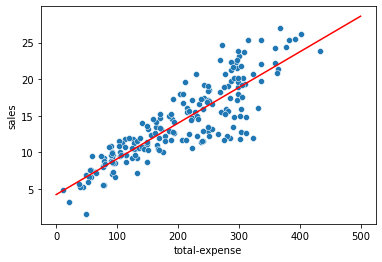

In [14]:
sns.scatterplot(x,y,data = df)
plt.plot(potential_spend, predicted_sales, color = 'red')


Our next ad campaign will have a total spend of $200, how many units do we expect to sell as a result of this?

In [15]:
predicted_sales = model[0] * 200 + model[1]
predicted_sales

13.980604079845964

## Overfitting, Underfitting, and Measuring Performance
### Notice we fit to order=1 , essentially a straight line, we can begin to explore higher orders, but does higher order mean an overall better fit? Is it possible to fit too much? Too little? How would we know and how do we even define a good fit?

In [16]:
# polynomial fit of 3rd degree
model1 = np.polyfit(x,y,3);
model1

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [17]:
# Potential Future Spend Budgets
potential_spend = np.linspace(0,500,100)

In [18]:
predicted_sales =   model1[0]*potential_spend**3 + model1[1]*potential_spend**2 + model1[2]*potential_spend**1 + model1[3]

C:\Users\subed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


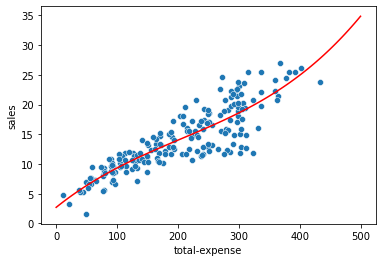

In [19]:
sns.scatterplot(x,y,data = df)
plt.plot(potential_spend, predicted_sales, color = 'red')

Is this better than the straight line fit?